In [55]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import pickle
from matplotlib import style
%matplotlib inline

In [56]:
df = pd.read_csv('student/student-mat.csv', sep=';')

In [57]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [58]:
data = df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]

In [59]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [60]:
predict = 'G3'

In [61]:
X = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

In [62]:
X_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1, random_state=3)

In [63]:
linear = linear_model.LinearRegression()

In [64]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
# save the model
with open('student_model.pickle', 'wb') as f:
    pickle.dump(linear, f)

In [12]:
# load the model
pickle_in = open('student_model.pickle', 'rb')
linear = pickle.load(pickle_in)

In [66]:
acc = linear.score(x_test, y_test)
acc

0.9206488944209273

In [67]:
linear.predict(x_test)

array([ 8.39995654, 13.84318749, 13.92721043, 10.5955481 ,  3.59368558,
       -1.79102979,  8.54929425,  7.00996163,  7.91767275, 10.6833075 ,
       11.8977836 , 10.75423989, 11.09024974, 14.60029638,  7.14994525,
       -1.06858616, 16.16013641,  8.38124837,  8.24126475, 10.11573624,
       14.92141644, 15.15477709, 14.25206695,  9.59505176,  8.70236842,
        9.28769496, 15.64947873, 12.63618432,  8.31467012,  8.31219714,
        9.28022204,  5.81498274, 16.37487082, 15.58790043,  9.52667324,
       10.98760054,  9.37171791,  6.23608179, -0.58877431,  8.49886927])

In [68]:
linear.coef_

array([ 0.1586918 ,  0.98111545, -0.16242826, -0.24330552,  0.03733443])

In [69]:
linear.intercept_

-1.6921439629558535

In [70]:
predictions = linear.predict(x_test)

In [71]:
for x in range(len(predictions)):
    print(f'Data: {x_test[x]}', f'Actual: {y_test[x]}', f'Prediction: {predictions[x]}', sep='  ')

Data: [10  9  2  0  0]  Actual: 9  Prediction: 8.399956544780991
Data: [13 14  3  0  6]  Actual: 14  Prediction: 13.84318749138513
Data: [14 14  3  0  4]  Actual: 14  Prediction: 13.927210434585595
Data: [11 11  2  0  2]  Actual: 11  Prediction: 10.595548097206382
Data: [7 5 3 1 0]  Actual: 0  Prediction: 3.593685575073561
Data: [5 0 1 3 0]  Actual: 0  Prediction: -1.7910297851596373
Data: [10  9  2  0  4]  Actual: 11  Prediction: 8.549294252102646
Data: [9 8 4 0 2]  Actual: 8  Prediction: 7.009961631188098
Data: [7 9 1 1 2]  Actual: 8  Prediction: 7.917672751981723
Data: [11 11  1  0  0]  Actual: 12  Prediction: 10.683307503265953
Data: [12 12  1  0  2]  Actual: 14  Prediction: 11.897783604739708
Data: [12 11  2  0  2]  Actual: 12  Prediction: 10.754239894067675
Data: [12 11  2  0 11]  Actual: 11  Prediction: 11.090249735541398
Data: [13 15  3  0  0]  Actual: 15  Prediction: 14.600296381354283
Data: [ 8  8  4  0 10]  Actual: 8  Prediction: 7.149945248970118
Data: [7 0 3 0 0]  Actual: 

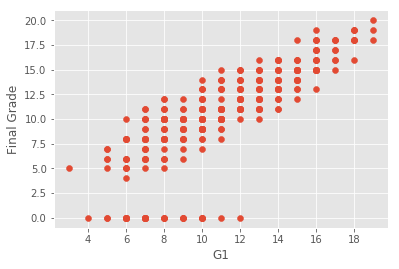

In [72]:
p = 'G1'
style.use('ggplot')
plt.scatter(data[p], data[predict])
plt.xlabel(p)
plt.ylabel('Final Grade')
plt.show()